In [28]:
import matplotlib.pyplot as plt
import numpy as np
import math


from scipy.signal import find_peaks
from scipy.integrate import odeint
from scipy.stats import gaussian_kde


In [29]:
# Set random seed (for reproducibility)
np.random.seed(1000)

# Start and end time (in milliseconds)
tmin = 0.0
tmax = 1000.0

# Average potassium channel conductance per unit area (mS/cm^2)
gK = 36.0

# Average sodoum channel conductance per unit area (mS/cm^2)
gNa = 120.0

# Average leak channel conductance per unit area (mS/cm^2)
gL = 0.3

# Membrane capacitance per unit area (uF/cm^2)
Cm = 1.0

# Potassium potential (mV)
VK = -12.0

# Sodium potential (mV)
VNa = 115.0

# Leak potential (mV)
Vl = 10.613

# Time values
T = np.linspace(tmin, tmax, 10000)

# Potassium ion-channel rate functions

def alpha_n(Vm):
    return (0.01 * (10.0 - Vm)) / (np.exp(1.0 - (0.1 * Vm)) - 1.0)

def beta_n(Vm):
    return 0.125 * np.exp(-Vm / 80.0)

# Sodium ion-channel rate functions

def alpha_m(Vm):
    return (0.1 * (25.0 - Vm)) / (np.exp(2.5 - (0.1 * Vm)) - 1.0)

def beta_m(Vm):
    return 4.0 * np.exp(-Vm / 18.0)

def alpha_h(Vm):
    return 0.07 * np.exp(-Vm / 20.0)

def beta_h(Vm):
    return 1.0 / (np.exp(3.0 - (0.1 * Vm)) + 1.0)
  
# n, m, and h steady-state values

def n_inf(Vm=0.0):
    return alpha_n(Vm) / (alpha_n(Vm) + beta_n(Vm))

def m_inf(Vm=0.0):
    return alpha_m(Vm) / (alpha_m(Vm) + beta_m(Vm))

def h_inf(Vm=0.0):
    return alpha_h(Vm) / (alpha_h(Vm) + beta_h(Vm))

In [30]:
def id(n):
    return 5

In [31]:
# Compute derivatives
def compute_derivatives(y, T):
    dy = np.zeros((4,))
    
    Vm = y[0]
    n = y[1]
    m = y[2]
    h = y[3]
    
    # dVm/dt
    GK = (gK / Cm) * np.power(n, 4.0)
    GNa = (gNa / Cm) * np.power(m, 3.0) * h
    GL = gL / Cm
    
    dy[0] = (id(T) / Cm) - (GK * (Vm - VK)) - (GNa * (Vm - VNa)) - (GL * (Vm - Vl))
    
    # dn/dt
    dy[1] = (alpha_n(Vm) * (1.0 - n)) - (beta_n(Vm) * n)
    
    # dm/dt
    dy[2] = (alpha_m(Vm) * (1.0 - m)) - (beta_m(Vm) * m)
    
    # dh/dt
    dy[3] = (alpha_h(Vm) * (1.0 - h)) - (beta_h(Vm) * h)
    
    return dy
  
# State (Vm, n, m, h)
Y = np.array([0.0, n_inf(), m_inf(), h_inf()])


# Solve ODE system
# Vy = (Vm[t0:tmax], n[t0:tmax], m[t0:tmax], h[t0:tmax])


In [32]:
def Vy1(listv):
    Vm_list = []
    for i in Vy:
        Vm_list.append(i[0])

    return Vm_list

In [33]:
def ISI(nx):
    list_nx = []
    for i in range(1,len(nx)):
        list_nx.append(nx[i]-nx[i-1])
    
    return list_nx
        
        

In [34]:
I_input = np.linspace(5,200,196)

#For Activation Function
peaklist = []

#For heights of "peaks"
ny_list = []

#For height data regardless of peak or not. Takes all heights
ny_distribution = []

#distribution of peak heights per _
list25 = []
list50 = []
list75 = []
list100 = []
list125 = []
list150 = []
list175 = []
list200 = []
ISI_list = [list25, list50, list75, list100, list125, list150, list175, list200]


In [35]:
for i in I_input:
    def id(t):
        return i
    Vy = odeint(compute_derivatives, Y, T)
    listV = Vy1(Vy)

    #For dataset of making KDE of distribution of datapoints
    ny_distribution = ny_distribution + listV
    #print(ny_distribution)

    #For computing the peaks
    peak_data = find_peaks(listV)[0]
    peaklist.append(len(peak_data))
    #print(listV)
    #print(listV[j] for j in peak_data)
    #ny_list.append(listV[j] for j in peak_data)
    for j in peak_data:
        ny = listV[j]
        ny_list.append(listV[j])

    
    #peak_data = peak_data.tolist()
    if i%25 == 0:
        run = i/25
        ISI_list[int(run)-1] = ISI(peak_data)
    

In [36]:
print(ny_list)

[103.83066986679877, 5.882392401444909, 4.1243357190245185, 3.5407833316001107, 3.3538697697190627, 3.2952759252956305, 3.27706108228696, 3.271405768742722, 3.269652603863894, 3.269108920210476, 3.2689404009753593, 3.268888354180607, 3.268872403954274, 3.2688677210255745, 3.2688662469525607, 3.26886577668871, 3.2688654215521544, 3.2688653726533716, 3.268865519883999, 3.2688654704841498, 104.20885195591896, 92.07806727068365, 7.872309541949496, 5.400030366800522, 4.440483061743704, 4.043270445526306, 3.8779632625424947, 3.8092764848884655, 3.7808328147185675, 3.769054703542407, 3.7641843771201096, 3.7621715599013976, 3.761339060554757, 3.7609951335003373, 3.7608531287200346, 3.7607945059561203, 3.7607703944387594, 3.76076060476453, 3.7607565283000217, 3.760755021068582, 3.7607541629501458, 3.760753982991897, 3.760754167576867, 3.760754330580843, 3.760754263506623, 3.7607542136233243, 3.760754088931203, 3.7607540136821394, 3.760754009946999, 3.7607539962313226, 104.64516182566692, 96.174

In [37]:
import numpy as np
import matplotlib.pyplot as plt

def damped_harmonic_oscillator(m, k, c, x0, v0, t_max, num_points=1000):
    """
    Simulates and plots a damped harmonic oscillator.
    
    Parameters:
    m (float): Mass of the oscillator.
    k (float): Spring constant.
    c (float): Damping coefficient.
    x0 (float): Initial displacement.
    v0 (float): Initial velocity.
    t_max (float): Maximum time for simulation.
    num_points (int): Number of points in the time array.
    """
    # Derived parameters
    omega0 = np.sqrt(k / m)  # undamped natural frequency
    zeta = c / (2 * np.sqrt(m * k))  # damping ratio
    
    if zeta < 1:
        # Underdamped case
        omega_d = omega0 * np.sqrt(1 - zeta**2)  # damped natural frequency
        t = np.linspace(0, t_max, num_points)
        x_t = np.exp(-zeta * omega0 * t) * (x0 * np.cos(omega_d * t) + 
              (v0 + zeta * omega0 * x0) / omega_d * np.sin(omega_d * t))
    else:
        # Critically damped and overdamped cases can be handled similarly
        raise NotImplementedError("This function currently only supports the underdamped case.")
    
    return t, x_t

# Example usage



<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

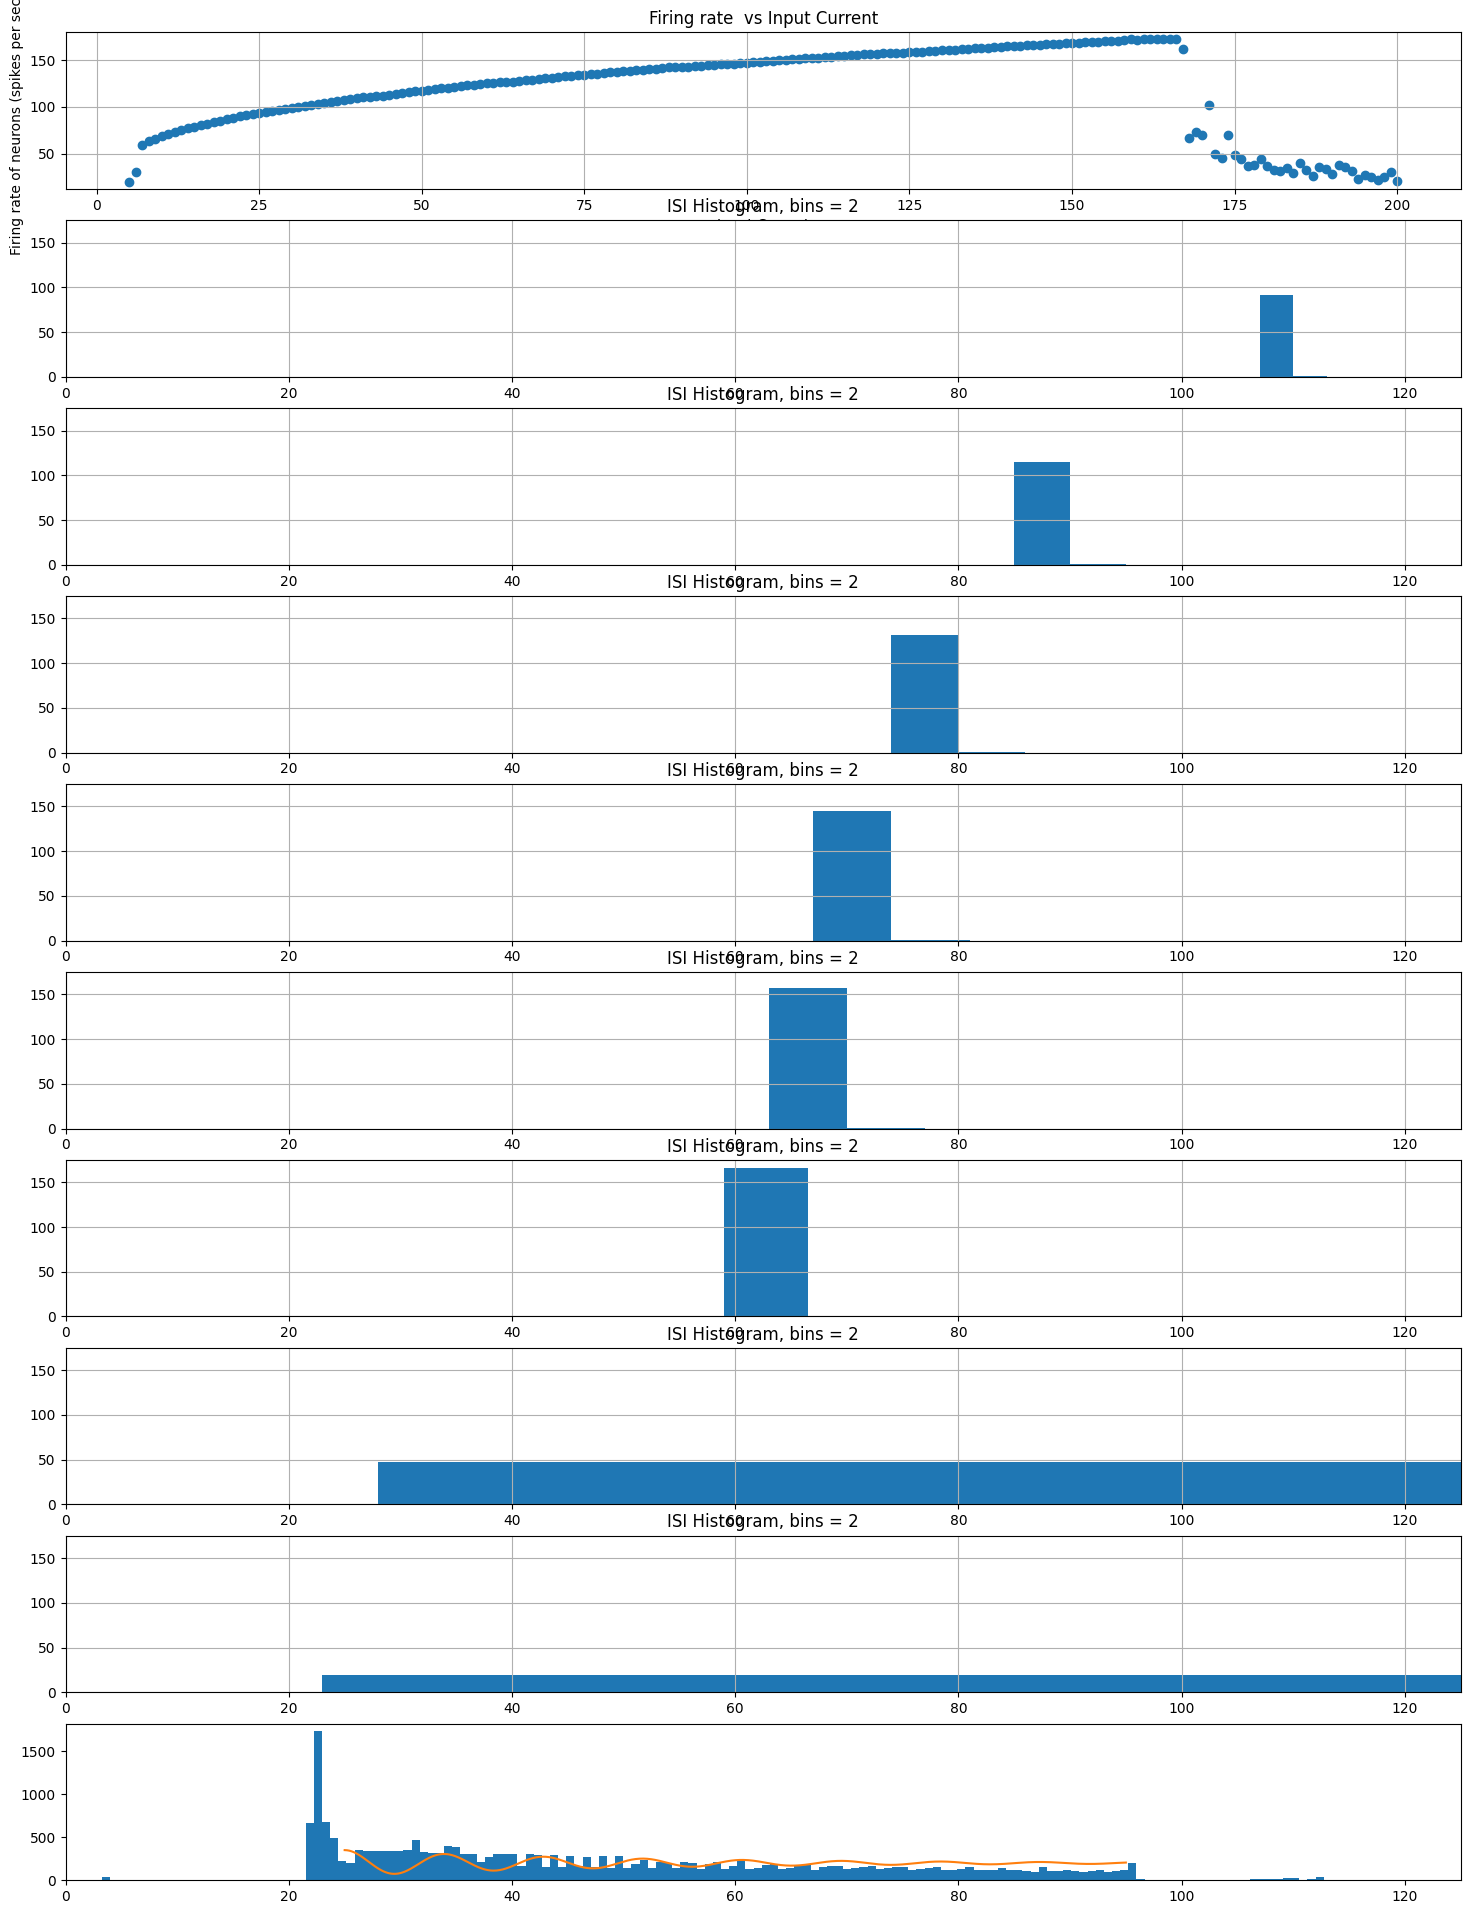

In [38]:
# Neuron potential
fig, axs = plt.subplots(10,1,figsize=(18, 24))
axs[0].scatter(I_input, peaklist)
axs[0].set_xlabel('Input Current')
axs[0].set_ylabel('Firing rate of neurons (spikes per second)')
axs[0].set_title('Firing rate  vs Input Current')
axs[0].grid(True)

for i in range(8):
    bin_num = math.floor(np.sqrt(len(ISI_list)))
    axs[i+1].hist(ISI_list[i], bins= bin_num )
    axs[i+1].set_ylim(0,175)
    axs[i+1].set_xlim(0,125)
    axs[i+1].grid(True)
    axs[i+1].set_title(f'ISI Histogram, bins = {bin_num}')
    axs[i+1].grid(True)

osc = damped_harmonic_oscillator(m=1.0, k=0.5, c=0.08, x0=150, v0=0, t_max=70)
bin_num = math.floor(np.sqrt(len(ny_list)))
axs[9].hist(ny_list, bins=bin_num)
axs[9].set_xlim(0,125)
axs[9].plot([k + 25 for k in osc[0]],[j+200 for j in osc[1]])

plt.tight_layout

In [39]:
kde1 = gaussian_kde(ny_list)
x_vals1 = np.linspace(min(ny_list), max(ny_list), 1000)
pdf_vals1 = kde1(x_vals1)

kde2 = gaussian_kde(ny_distribution)
x_vals2 = np.linspace(min(ny_list), max(ny_list), 1000)
pdf_vals2 = kde2(x_vals2)



Crit Value: 22.24002619005046


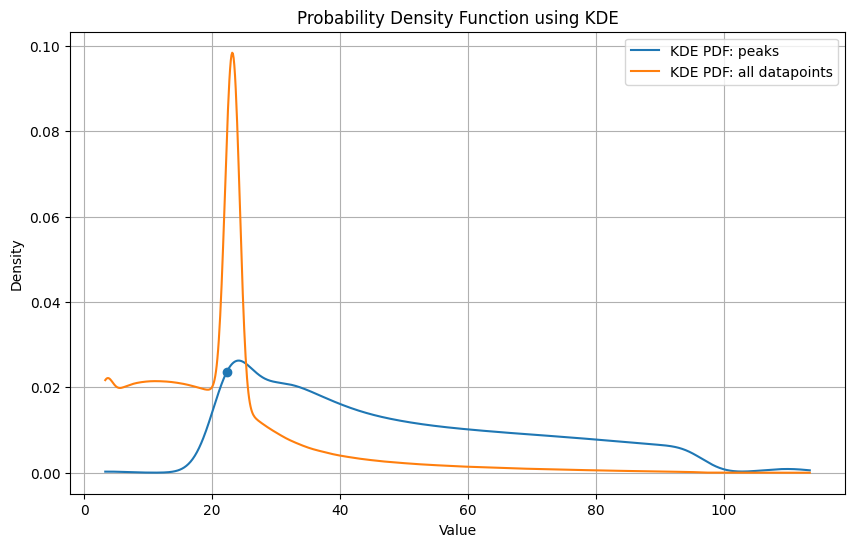

In [40]:
insx = [np.abs(pdf_vals1[i]-pdf_vals2[i]) for i in range(len(pdf_vals1)-500)]
#print(insx.index(min(insx)))
#print(len(pdf_vals1))

insx_x = [x_vals1[172]]
insx_y = [pdf_vals1[172]]

print(f'Crit Value: {x_vals1[172]}')
Crit = x_vals1[172]

plt.figure(figsize=(10, 6))
plt.plot(x_vals1, pdf_vals1, label='KDE PDF: peaks')
plt.plot(x_vals2, pdf_vals2, label = 'KDE PDF: all datapoints')
plt.scatter(insx_x, insx_y)
plt.title('Probability Density Function using KDE')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()